In [1]:
import pandas as pd
from Bio import Phylo
import networkx as nx
import copy

In [2]:
# Using readlines()
file = open('./imagenet_mintree.txt', 'r')
Lines = file.readlines()
edge_list = []

# Strips the newline character
for line in Lines:
    pair = line.lower().strip().split(' ')
    if pair:
        edge_list.append(pair)
G = nx.DiGraph((edge) for edge in edge_list)


In [3]:
wordnet = dict()
wordnet_inverse = dict()
# Using readlines()
file = open('./words.txt', 'r')
Lines = file.readlines()
val = 0

# Strips the newline character
words = []
for line in Lines:
    line = line.lower().strip().split('\t')
    code = line[0]
    names = line[1].split(', ')
    if code in G.nodes():
        wordnet_inverse[code] = tuple(names)
        for n in names:
            wordnet[n] = code
        words += names
    

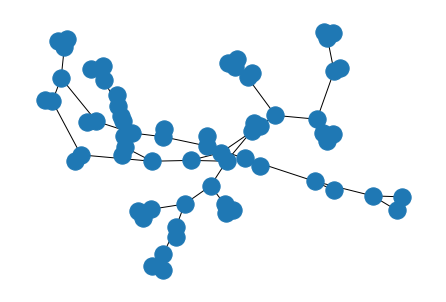

In [4]:
import networkx as nx
import pylab
tree = Phylo.read('./placental_mammals.newick.txt','newick')
net = Phylo.to_networkx(tree)
nx.draw(net)

In [5]:
# Using readlines()
file = open('./name_convert.txt', 'r')
Lines = file.readlines()
name_dict = dict()

# Strips the newline character
for line in Lines:
    line = line.lower().strip()
    code = line[12:].split(' ')[0]
    common_name = line[line.find("(")+1:line.find(")")]
    name_dict[code] = common_name
tree_classes = list(name_dict.values())

In [6]:
valid_classes = set(words)&set(tree_classes)
len(valid_classes)

28

In [7]:
print(valid_classes)

{'armadillo', 'wallaby', 'lizard', 'squirrel', 'chimp', 'dog', 'platypus', 'sloth', 'dolphin', 'finch', 'marmoset', 'elephant', 'gibbon', 'hedgehog', 'fish', 'baboon', 'opossum', 'frog', 'pufferfish', 'pig', 'rabbit', 'horse', 'mouse', 'cat', 'sheep', 'gorilla', 'echidna', 'possum'}


In [8]:
valid_code = []
for vc in valid_classes:
    valid_code.append(wordnet[vc])
print(valid_code)

['n02454379', 'n01877812', 'n01674464', 'n02355227', 'n02481823', 'n02084071', 'n01873310', 'n02456962', 'n02068974', 'n01529672', 'n02490219', 'n02503517', 'n02483362', 'n02346627', 'n02512053', 'n02486410', 'n01881171', 'n01639765', 'n02655020', 'n02395406', 'n02324045', 'n02374451', 'n03793489', 'n02127808', 'n02411705', 'n02480855', 'n01872401', 'n01881171']


In [9]:
leaf = {x for x in G.nodes() if G.out_degree(x)==0 and G.in_degree(x)==1}
des = set()
for node in valid_code:
    des = des.union(nx.descendants(G, node))
len(des)

237

In [10]:
res = des.intersection(des, leaf)
len(res)

169

In [11]:
dic = {}
for node in valid_code:
    dic[node] = nx.descendants(G, node).intersection(nx.descendants(G, node), leaf)

In [12]:
for node in list(net.nodes):
    if str(node)[2:].lower() in name_dict:
        name = name_dict[str(node)[2:].lower()]
        if name in wordnet:
            code = wordnet[name]
            mapping = {node:code}
            net = nx.relabel_nodes(net, mapping)

In [13]:
for node in list(net.nodes):
    if str(node)[1] == '_':
        net.remove_node(node)

In [14]:
for node in list(net.nodes):
    if str(node) in dic:
        for newleave in dic[str(node)]:
            net.add_node(newleave)
            net.add_edge(node, newleave)

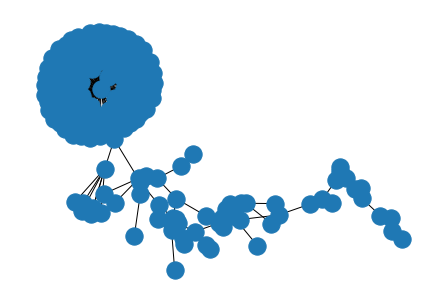

In [15]:
nx.draw(net)

In [16]:
index = 0
for node in list(net.nodes):
    if str(node) == "Clade":
        newname = "Clade" + str(index)
        mapping = {node:newname}
        net = nx.relabel_nodes(net, mapping)
        index +=1

In [20]:
leave_nodes = [x for x in net.nodes() if net.degree(x) == 1]
for x in leave_nodes:
    if str(x)[0] == 'C':
        net.remove_node(x)

In [21]:
print(len([x for x in net.nodes() if net.degree(x) == 1]))

139


In [22]:
nx.write_edgelist(net, './imagenet_animal_kingdom.txt', comments='#', delimiter=' ', data=False)